In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
dataset = pd.read_csv("../csvs/bank-loan.csv")
dataset.head(3)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40,1.0,15.0,14.0,55.0,5.5,0.856075,NaN,0.0


In [18]:
dataset.isnull().sum()

age           0
ed            3
employ       15
address       5
income       10
debtinc       8
creddebt     12
othdebt      23
default     150
dtype: int64

In [19]:
dataset["othdebt"].fillna(dataset["othdebt"].mean(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6264\3647607675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["othdebt"].fillna(dataset["othdebt"].mean(), inplace=True)


In [20]:
dataset.isnull().sum()


age           0
ed            3
employ       15
address       5
income       10
debtinc       8
creddebt     12
othdebt       0
default     150
dtype: int64

In [21]:
q1 = dataset["othdebt"].quantile(0.25)
q3 = dataset["othdebt"].quantile(0.75)

IQR = q3 - q1

In [22]:
min_r = q1 - (1.5 * IQR)
max_r = q3 + (1.5 * IQR)

max_r,min_r

(7.908548000000001, -3.0457200000000006)

In [23]:
dataset = dataset[dataset["othdebt"] <= max_r]
dataset


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40,1.0,15.0,14.0,55.0,5.5,0.856075,3.080809,0.0
3,41,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


C:\Users\Hp\AppData\Local\Temp\ipykernel_6264\2200726019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["othdebt"])


<Axes: xlabel='othdebt', ylabel='Density'>

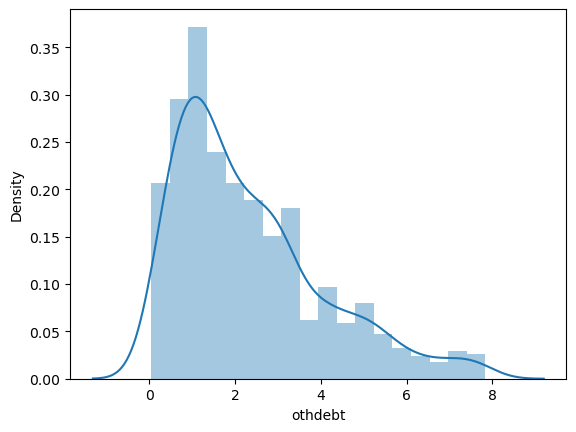

In [24]:
sns.distplot(dataset["othdebt"])

In [25]:
# log base 1 not 10 or e, because "0" will return infinity with base 10, "e"
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func=np.log1p)

In [26]:
ft.fit(dataset[["othdebt"]])
ft.transform(dataset[["othdebt"]])

,othdebt
0,1.793193
1,1.609597
2,1.406295
3,0.599540
4,1.400336
...,...
845,0.485306
846,1.276840
847,1.477436
848,0.897941


In [27]:
dataset["othdebt_ft_new"] = ft.transform(dataset[["othdebt"]])

In [28]:
dataset.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,othdebt_ft_new
0,41,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0,1.793193
1,27,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0,1.609597
2,40,1.0,15.0,14.0,55.0,5.5,0.856075,3.080809,0.0,1.406295
3,41,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0,0.599540
4,24,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0,1.400336


C:\Users\Hp\AppData\Local\Temp\ipykernel_6264\2597447365.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["othdebt"])
C:\Users\Hp\AppData\Local\Temp\ipykernel_6264\2597447365.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["othdebt_ft_new"])


<Axes: title={'center': 'After'}, xlabel='othdebt_ft_new', ylabel='Density'>

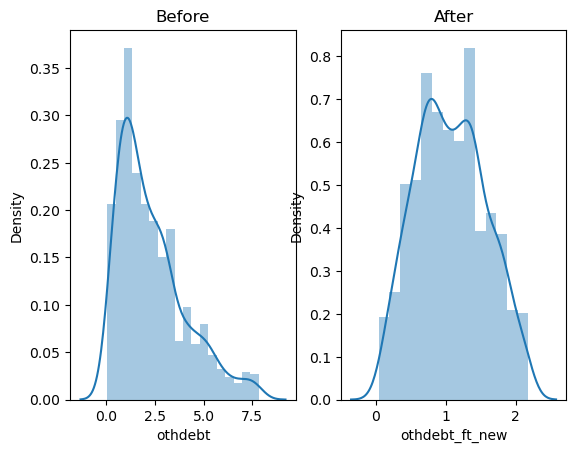

In [29]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["othdebt"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["othdebt_ft_new"])